In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
from scipy import stats
from scipy.stats import chi2_contingency, skew, shapiro, kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, Perceptron, SGDClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import LocalOutlierFactor
from math import sqrt
import math

#  🗂️📥📊 Import Dataset:

In [2]:
df = pd.read_csv('automobile_fiat_500.csv')
df

,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,lounge,51.0,882.0,25000.0,1,44.907242,8.611560,8900
1,pop,51.0,1186.0,32500.0,1,45.666359,12.241890,8800
2,sport,74.0,4658.0,142228.0,1,45.503300,11.417840,4200
3,lounge,51.0,2739.0,160000.0,1,40.633171,17.634609,6000
4,pop,73.0,3074.0,106880.0,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...
1533,sport,51.0,3712.0,115280.0,1,45.069679,7.704920,5200
1534,lounge,74.0,3835.0,112000.0,1,45.845692,8.666870,4600
1535,pop,51.0,2223.0,NaN,1,45.481541,9.413480,7500
1536,lounge,51.0,2557.0,80750.0,1,45.000702,7.682270,5990


In [3]:
original_df = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            1538 non-null   object 
 1   engine_power     1509 non-null   float64
 2   age_in_days      1515 non-null   float64
 3   km               1512 non-null   float64
 4   previous_owners  1538 non-null   int64  
 5   lat              1538 non-null   float64
 6   lon              1538 non-null   float64
 7   price            1538 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 96.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_power,1509.0,51.914513,4.015881,51.000000,51.00000,51.000000,51.00000,77.000000
age_in_days,1515.0,1649.479868,1287.524225,366.000000,670.00000,1035.000000,2616.00000,4658.000000
km,1512.0,53224.776455,39971.554822,1232.000000,20000.00000,39000.000000,79000.00000,235000.000000
previous_owners,1538.0,1.123537,0.416423,1.000000,1.00000,1.000000,1.00000,4.000000
lat,1538.0,43.541361,2.133518,36.855839,41.80299,44.394096,45.46796,46.795612
lon,1538.0,11.563428,2.328190,7.245400,9.50509,11.869260,12.76904,18.365520
price,1538.0,8576.003901,1939.958641,2500.000000,7122.50000,9000.000000,10000.00000,11100.000000


# After loading the dataset, we obtained an overview of the data, which consists of 1538 records and 8 features. Additionally, I used the describe method to gain statistical insights into the numeric variables.

# 🖥️📑 View Records:

In [6]:
df.head()

,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,lounge,51.0,882.0,25000.0,1,44.907242,8.611560,8900
1,pop,51.0,1186.0,32500.0,1,45.666359,12.241890,8800
2,sport,74.0,4658.0,142228.0,1,45.503300,11.417840,4200
3,lounge,51.0,2739.0,160000.0,1,40.633171,17.634609,6000
4,pop,73.0,3074.0,106880.0,1,41.903221,12.495650,5700


In [7]:
df.tail()

,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
1533,sport,51.0,3712.0,115280.0,1,45.069679,7.70492,5200
1534,lounge,74.0,3835.0,112000.0,1,45.845692,8.66687,4600
1535,pop,51.0,2223.0,NaN,1,45.481541,9.41348,7500
1536,lounge,51.0,2557.0,80750.0,1,45.000702,7.68227,5990
1537,pop,51.0,NaN,54276.0,1,40.323410,17.56827,7900


# I retrieved the first 5 and last 5 records to better understand the data.

# 📋🔢 Determine Data Types:

In [8]:
df.dtypes

model               object
engine_power       float64
age_in_days        float64
km                 float64
previous_owners      int64
lat                float64
lon                float64
price                int64
dtype: object

In [9]:
for i in df.columns:
    print(i, ':', '\n')
    print(df[i].value_counts(normalize=True)*100, '\n')  
    print('*' * 40) 

model : 

model
lounge    71.131339
pop       23.276983
sport      5.591678
Name: proportion, dtype: float64 

****************************************
engine_power : 

engine_power
51.0    94.433400
62.0     2.783300
73.0     1.457919
74.0     0.927767
77.0     0.198807
63.0     0.066269
66.0     0.066269
58.0     0.066269
Name: proportion, dtype: float64 

****************************************
age_in_days : 

age_in_days
790.0     5.346535
366.0     5.346535
701.0     5.280528
397.0     5.016502
670.0     4.818482
            ...   
3135.0    0.132013
3105.0    0.132013
4443.0    0.066007
2800.0    0.066007
1736.0    0.066007
Name: proportion, Length: 140, dtype: float64 

****************************************
km : 

km
17000.0     0.992063
56779.0     0.793651
15000.0     0.727513
19000.0     0.727513
120000.0    0.727513
              ...   
3600.0      0.066138
80646.0     0.066138
56400.0     0.066138
13111.0     0.066138
54276.0     0.066138
Name: proportion, Length: 977, 

In [10]:
for i in df:
    print(i, ':', '\n')
    print(df[i].nunique(), '\n')  
    print('*' * 40) 

model : 

3 

****************************************
engine_power : 

8 

****************************************
age_in_days : 

140 

****************************************
km : 

977 

****************************************
previous_owners : 

4 

****************************************
lat : 

449 

****************************************
lon : 

450 

****************************************
price : 

222 

****************************************


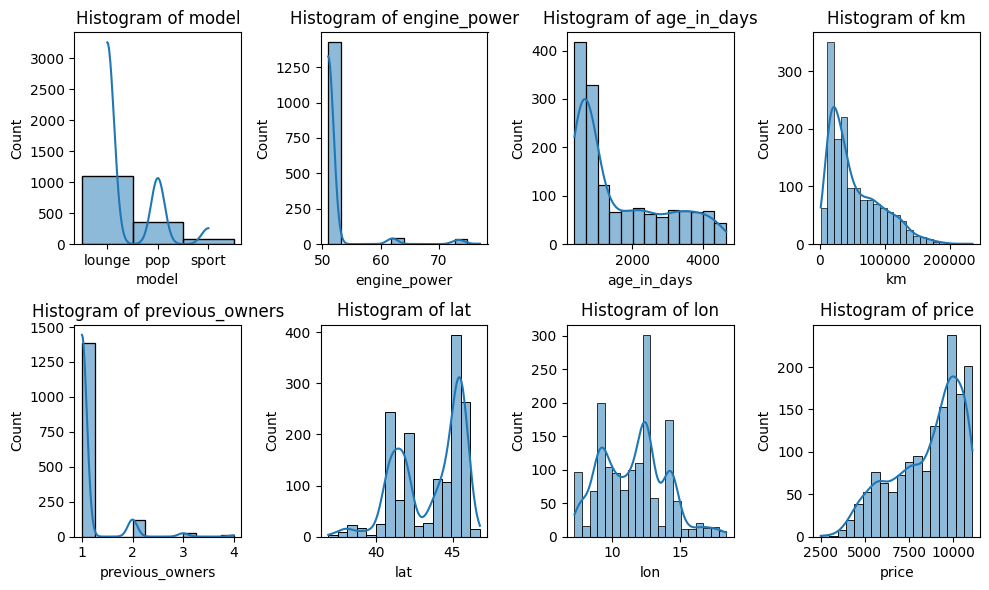

In [11]:
fig, ax = plt.subplots(2,4, figsize = (10, 6))
axes = ax.flatten()

for i, col in enumerate(df.columns):
     sns.histplot(data=df, x=col, kde=True, ax=axes[i])
     axes[i].set_title(f'Histogram of {col}')
    
plt.tight_layout()  
plt.show()

# After inspecting all variables using plots, as well as the value_counts() and nunique() methods, I found that the 'engine_power' column has only 8 unique values, and the 'previous_owners' column has 4 unique values. Although both columns are of numerical data type, I consider them discrete variables based on the limited number unique values. Therefore, the categorical variables are ['model', 'engine_power', 'previous_owners'], and the numerical variables are ['age_in_days', 'km', 'lat', 'lon', 'price']. The target variable is 'price'.

In [12]:
df.isna().sum()

model               0
engine_power       29
age_in_days        23
km                 26
previous_owners     0
lat                 0
lon                 0
price               0
dtype: int64

In [13]:
df['age_in_days'] = df['age_in_days'].fillna(df['age_in_days'].mean())
df['km'] = df['km'].fillna(df['km'].mean())
df['engine_power'] = df['engine_power'].fillna(df['engine_power'].mode()[0])

In [14]:
df.isna().sum()

model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

# I identified missing values in the data; numeric variables were imputed with the mean, and categorical variables with the mode.

# 🔄📑 Duplicate Entries:

In [15]:
df.duplicated().sum()

17

In [16]:
nodup_df = df.drop_duplicates()
nodup_df

,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,lounge,51.0,882.000000,25000.000000,1,44.907242,8.611560,8900
1,pop,51.0,1186.000000,32500.000000,1,45.666359,12.241890,8800
2,sport,74.0,4658.000000,142228.000000,1,45.503300,11.417840,4200
3,lounge,51.0,2739.000000,160000.000000,1,40.633171,17.634609,6000
4,pop,73.0,3074.000000,106880.000000,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...
1533,sport,51.0,3712.000000,115280.000000,1,45.069679,7.704920,5200
1534,lounge,74.0,3835.000000,112000.000000,1,45.845692,8.666870,4600
1535,pop,51.0,2223.000000,53224.776455,1,45.481541,9.413480,7500
1536,lounge,51.0,2557.000000,80750.000000,1,45.000702,7.682270,5990


In [17]:
df.shape, nodup_df.shape

((1538, 8), (1521, 8))

# The data has 17 duplicate recore. After deleting duplicated record, we have 1521 rows and 8 columns.

# 📈🧐 Univariate Analysis:

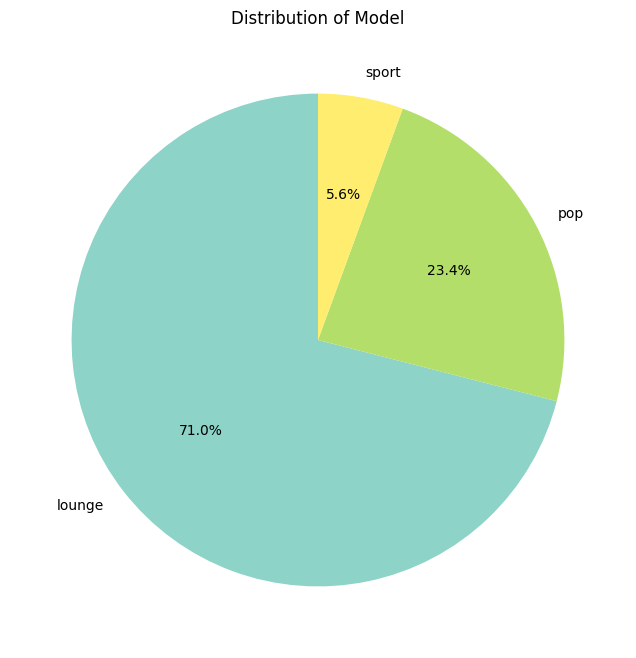

In [18]:
model_counts = nodup_df['model'].value_counts()

plt.figure(figsize=(8, 8))
model_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of Model')
plt.ylabel('') 
plt.show()

# I created a pie chart to visualize the distribution of the categorical variable. In the 'model' distribution, 'lounge' accounts for 71%, 'pop' makes up 23.4%, and 'sport' represents 5.6%.

engine_power
51.0      1437
62.0        42
73.0        22
74.0        14
Others       6
Name: count, dtype: int64


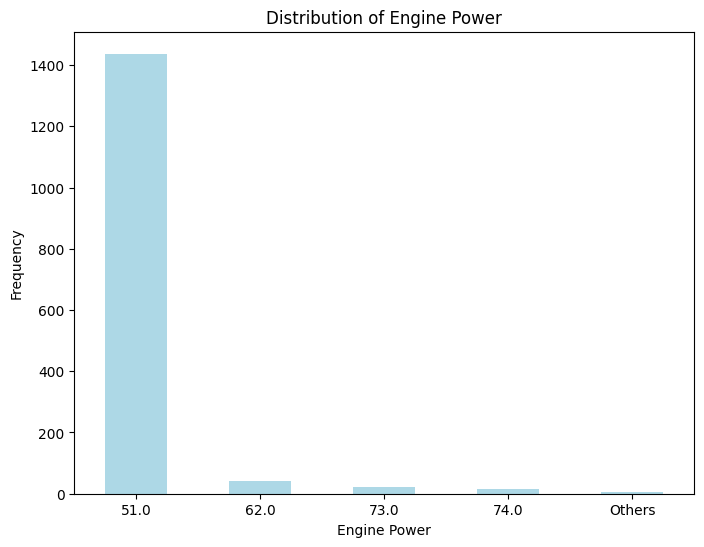

In [20]:
nodup_df.loc[:, 'engine_power'] = nodup_df['engine_power'].replace([77.0, 63.0, 66.0, 58.0], 'Others')
engine_power_counts = nodup_df['engine_power'].value_counts()
print(engine_power_counts)

engine_power_counts.plot(kind='bar', color='lightblue', figsize=(8, 6))
plt.title('Distribution of Engine Power')
plt.xlabel('Engine Power')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Engine power values with only one occurrence were grouped into "Others." A bar chart for the 'engine_power' variable showed the highest frequency at 51.

previous_owners
1    1373
2     117
3      22
4       9
Name: count, dtype: int64


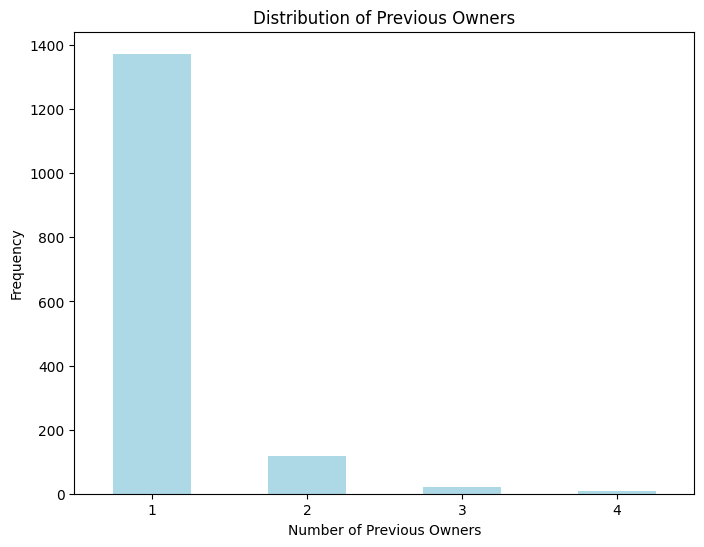

In [21]:
previous_owners_counts = nodup_df['previous_owners'].value_counts()
print(previous_owners_counts)

previous_owners_counts.plot(kind='bar', color='lightblue', figsize=(8, 6))
plt.title('Distribution of Previous Owners')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# I plotted a bar chart for the 'previous_owners' variable, showing the highest frequency in the first group.

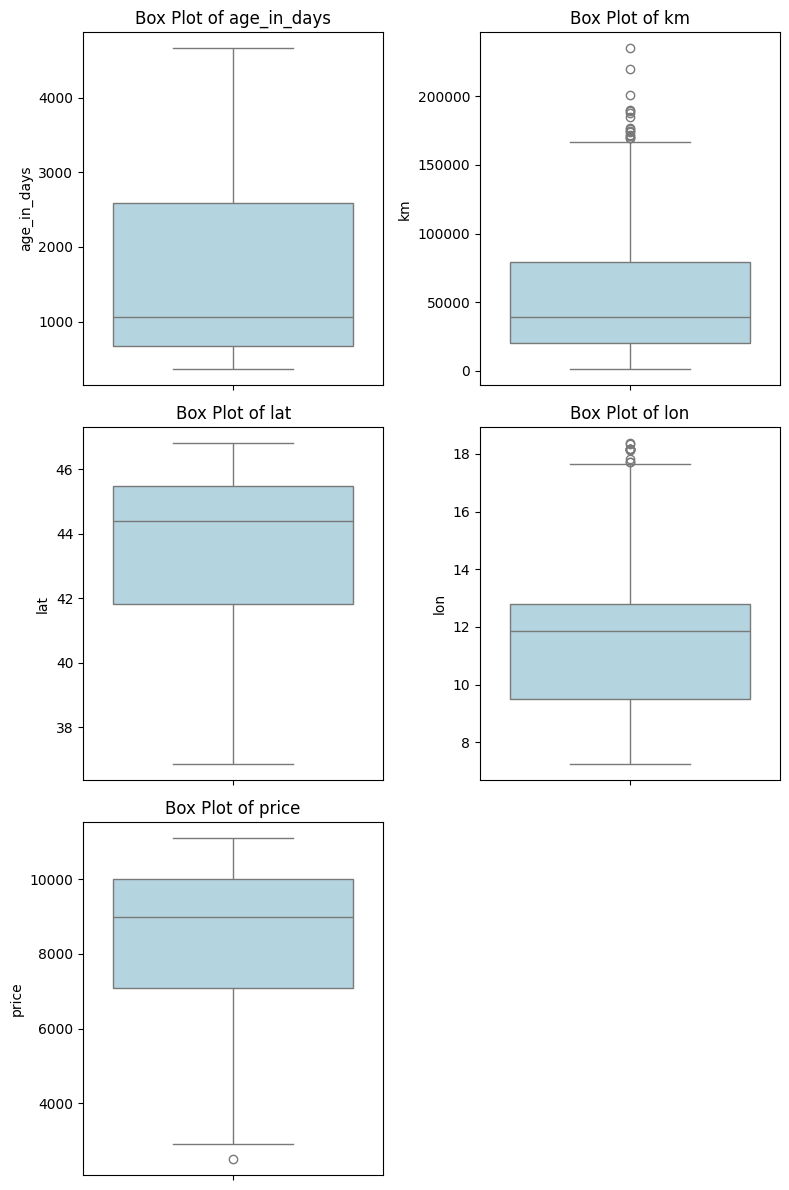

In [22]:
num_vars = ['age_in_days', 'km', 'lat', 'lon', 'price']

plt.figure(figsize=(8, 12)) 

for i, col in enumerate(num_vars, 1):
    plt.subplot(3, 2, i)  
    sns.boxplot(y=nodup_df[col], color='lightblue')  
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# I created a set of box plots using a subplot layout. These plots reveal that the 'lon', 'km' and 'price' variables contain some outliers, represented by points outside the typical range of values.

# 📈🤝  Bivariate analysis: 

# a) Bivariate analysis between model and engine_power:

# Null Hypothesis (H0): The two categorical variables ('model' and 'engine_power') are independent.

In [23]:
var1 = "model"
var2 = "engine_power"

crosstab = pd.crosstab(nodup_df[var1], nodup_df[var2])
print("Crosstab of the variables:")
print(crosstab)

chi_2, p_value, dof, exp_val = chi2_contingency(crosstab)
print('\n', f'chi_2: {chi_2:.2f}')
print(f'dof: {dof}')
print('Expected Values:', exp_val)

if p_value <= 0.05:
    print(f"\nThe p-value for the chi-square test of independence is {p_value}. "
          f"As this is less than 0.05, we reject the null hypothesis that "
          f"{var1} and {var2} are independent. Therefore, we conclude that {var1} and {var2} are dependent.")
else:
    print(f"\nThe p-value for the chi-square test of independence is {p_value}. "
          f"As this is greater than 0.05, we fail to reject the null hypothesis that "
          f"{var1} and {var2} are independent.")

Crosstab of the variables:
engine_power  51.0  62.0  73.0  74.0  Others
model                                       
lounge        1043    20     6    10       1
pop            331    14     6     1       4
sport           63     8    10     3       1

 chi_2: 108.05
dof: 8
Expected Values: [[1.02035503e+03 2.98224852e+01 1.56213018e+01 9.94082840e+00
  4.26035503e+00]
 [3.36339250e+02 9.83037475e+00 5.14924392e+00 3.27679158e+00
  1.40433925e+00]
 [8.03057199e+01 2.34714004e+00 1.22945431e+00 7.82380013e-01
  3.35305720e-01]]

The p-value for the chi-square test of independence is 9.594785138552522e-20. As this is less than 0.05, we reject the null hypothesis that model and engine_power are independent. Therefore, we conclude that model and engine_power are dependent.


# A crosstab was created between 'model' and 'engine_power,' followed by a chi-square test of independence. Since the p-value is less than 0.05, we reject the null hypothesis, indicating a significant relationship between model type and engine power. Thus, engine power distribution depends on the model type (lounge, pop, or sport).

# b) Bivariate analysis between model and price variables:

# b.1) Null Hypothesis (H₀): The data follows a normal distribution.

In [24]:
stat, p_value = shapiro(nodup_df['price'])
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'p-value: {p_value}')

if p_value > 0.05:
    print("The data is likely normally distributed (fail to reject null hypothesis).")
else:
    print("The data is not normally distributed (reject the null hypothesis).")

Shapiro-Wilk Test Statistic: 0.9176033002623699
p-value: 5.2024615232673165e-28
The data is not normally distributed (reject the null hypothesis).


# A Shapiro-Wilk test for normality was performed on 'price.' Since the p-value is much smaller than 0.05, we reject the null hypothesis, indicating that the data is not normally distributed. Therefore, a non-parametric test is used.

# b.2) Null Hypotheses: The median price is the same across all categories of the model.

In [26]:
lounge_prices = nodup_df[nodup_df['model'] == 'lounge']['price']
pop_prices = nodup_df[nodup_df['model'] == 'pop']['price']
sport_prices = nodup_df[nodup_df['model'] == 'sport']['price']

stat, p_value = kruskal(lounge_prices, pop_prices, sport_prices)
print(f"Kruskal-Wallis test statistic: {stat}")
print(f"P-value: {p_value}")

if p_value <= 0.05:
    print(f"The p-value is {p_value}, indicating a significant difference in 'price' across 'model'.")
else:
    print(f"The p-value is {p_value}, indicating no significant difference in 'price' across 'model'.")

Kruskal-Wallis test statistic: 170.72766249889128
P-value: 8.451993108024646e-38
The p-value is 8.451993108024646e-38, indicating a significant difference in 'price' across 'model'.


# Subsets were created for each model category, followed by a Kruskal-Wallis test. Since the p-value is less than 0.05, we reject the null hypothesis, concluding that the median price is not the same across all model categories.

# 🚨📈  "Techniques for Handling Outliers"

# "Outlier Detection Using the Tukey Method"

In [27]:
num_vars = ['age_in_days', 'km', 'lat', 'lon', 'price']

outliers_dict = {}

for var in num_vars:
    Q1 = nodup_df[var].quantile(0.25)
    Q3 = nodup_df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = nodup_df[(nodup_df[var] < lower_bound) | (nodup_df[var] > upper_bound)]
    outliers_dict[var] = {
        'outliers': outliers.index.tolist(), 
        'count': outliers.shape[0]}
    print(f"Variable: {var}")
    print(f"Number of outliers detected: {outliers.shape[0]}")

Variable: age_in_days
Number of outliers detected: 0
Variable: km
Number of outliers detected: 15
Variable: lat
Number of outliers detected: 0
Variable: lon
Number of outliers detected: 12
Variable: price
Number of outliers detected: 1


# After applying the Tukey method for outlier detection, no outliers were found in the variables of 'age_in_days' and 'lat'. However, 15 outliers were identified in 'km', 12 outliers in 'lon', and 1 outlier in 'price', in that order.

# A) "Dealing with Price Outliers"

In [28]:
price_outlier = outliers_dict['price']['outliers']

if len(price_outlier) == 1:
    final_df = nodup_df.drop(price_outlier[0])
    print(f"Number of rows after removing price outlier: {final_df.shape[0]}")
else:
    print("No outlier or more than one outlier found in 'price' column.")

Number of rows after removing price outlier: 1520


# Since the 'price' variable has only one outlier, I removed it without significant concern about data loss. The updated dataframe(final_df) now contains 1,520 records.

# B) "Dealing with 'Km' and 'lon' Outliers"

In [29]:
cap_vars = ['km', 'lon']

final_df_capped = final_df.copy()

for var in cap_vars:
    Q1 = final_df_capped[var].quantile(0.25)
    Q3 = final_df_capped[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    final_df_capped[var] = final_df_capped[var].clip(lower=lower_bound, upper=upper_bound)

print(f"Number of rows after capping km and lon: {final_df_capped.shape[0]}")

Number of rows after capping km and lon: 1520


In [30]:
df.shape, nodup_df.shape, final_df.shape, final_df_capped.shape

((1538, 8), (1521, 8), (1520, 8), (1520, 8))

# I applied the capping method to handle outliers in the 'km' and 'lon' variables. The original dataframe(df) contained 1,538 rows and 8 columns. After removing 21 duplicate records, I created nodup_df, which has 1,521 unique records and 8 columns. I then identified and removed one outlier in the 'price' column, resulting in a cleaned dataframe (final_df) with 1,520 unique records and 8 columns, free of duplicates and outliers. Finally, I applied the capping method to address outliers in the 'km' and 'lon' columns, creating final_df_capped, which also contains 1,520 unique records and 8 columns. This dataframe will be used for further analysis.

# 🔠  Encode the dataset:

In [31]:
cat_vars = ['model', 'engine_power', 'previous_owners']

X = final_df_capped.drop(['price'], axis=1)
y = final_df_capped['price']

encoded_df = pd.get_dummies(X, columns=cat_vars, drop_first=True)
encoded_df.head()

,age_in_days,km,lat,lon,model_pop,model_sport,engine_power_62.0,engine_power_73.0,engine_power_74.0,engine_power_Others,previous_owners_2,previous_owners_3,previous_owners_4
0,882.0,25000.0,44.907242,8.611560,False,False,False,False,False,False,False,False,False
1,1186.0,32500.0,45.666359,12.241890,True,False,False,False,False,False,False,False,False
2,4658.0,142228.0,45.503300,11.417840,False,True,False,False,True,False,False,False,False
3,2739.0,160000.0,40.633171,17.634609,False,False,False,False,False,False,False,False,False
4,3074.0,106880.0,41.903221,12.495650,True,False,False,True,False,False,False,False,False


In [32]:
print("Encoded_df shape:", encoded_df.shape)
print("Encoded_df data types:\n", encoded_df.dtypes)

Encoded_df shape: (1520, 13)
Encoded_df data types:
 age_in_days            float64
km                     float64
lat                    float64
lon                    float64
model_pop                 bool
model_sport               bool
engine_power_62.0         bool
engine_power_73.0         bool
engine_power_74.0         bool
engine_power_Others       bool
previous_owners_2         bool
previous_owners_3         bool
previous_owners_4         bool
dtype: object


In [33]:
df.shape, nodup_df.shape, encoded_df.shape

((1538, 8), (1521, 8), (1520, 13))

# After encoding the categorical variables using one-hot encoding with pd.get_dummies(), the categorical features were transformed into numerical format, with the first category dropped to avoid multicollinearity, resulting in a new DataFrame encoded_df.

# 🔍📈  Collinearity:

Collinear pairs with correlation greater than 0.6:
km and age_in_days: 0.82
age_in_days and km: 0.82
lon and lat: -0.77
lat and lon: -0.77


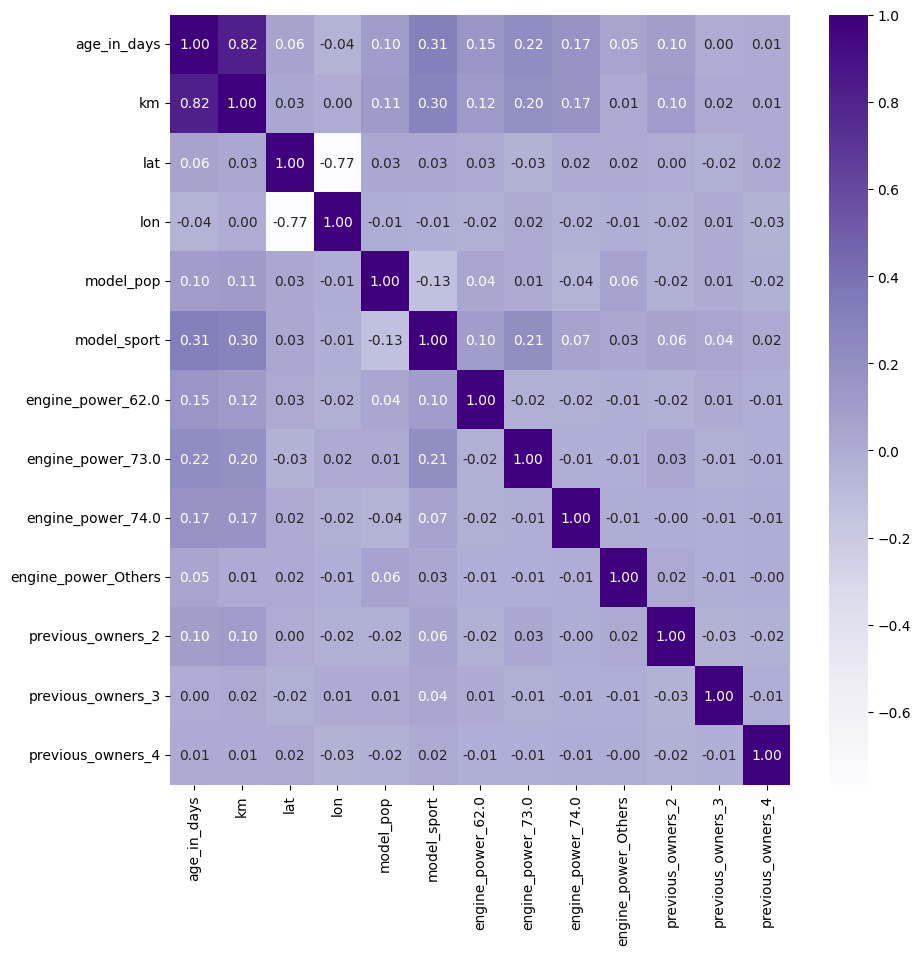

In [34]:
corr_matrix = encoded_df.corr()

threshold = 0.6
collinear_pairs = []

for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, col]) > threshold and row != col:
            collinear_pairs.append((row, col, corr_matrix.loc[row, col]))

print("Collinear pairs with correlation greater than 0.6:")
for pair in collinear_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Purples')
plt.show()

# I set the threshold for correlation at 0.6. After analyzing the relationships between numeric variables, I identified a high correlation of 0.82 between km (kilometers driven) and age_in_days and a correlation of -0.77 between lon (longitude) and lat (latitude). To address collinearity, I decided to remove the age_in_days and lon variables.

# The correlation of 0.82 between km and age_in_days reflects a strong positive relationship, indicating that older vehicles tend to have higher mileage. Similarly, the correlation of -0.77 between lon and lat shows a strong negative relationship, meaning as one variable increases, the other decreases significantly.

# Multi-collinearity

In [35]:
X = encoded_df.drop(['price', 'lon', 'age_in_days'], axis=1, errors='ignore') 
X = X.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                Feature       VIF
0                    km  3.441519
1                   lat  3.106531
2             model_pop  1.379308
3           model_sport  1.243822
4     engine_power_62.0  1.057541
5     engine_power_73.0  1.095523
6     engine_power_74.0  1.046190
7   engine_power_Others  1.011002
8     previous_owners_2  1.101404
9     previous_owners_3  1.019180
10    previous_owners_4  1.008169


# Since all features have a VIF less than 5, there is no multicollinearity between the variables. As a result, I have retained all features for further analysis, and the dataframe now contains 1520 records and 11 columns.

# ➗  Split the dataset:

In [36]:
X = encoded_df.drop(['lon', 'age_in_days'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1216, 11), Test set: (304, 11)


# I split the dataset into two parts: 80% for the training set and 20% for the test set. I used encoded_df after removing the age_in_days and lon columns to address collinearity concerns.

# 🔧  Scaling:

In [37]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"Scaled Training Set: {X_train_scaled.shape}")
print(f"Scaled Test Set: {X_test_scaled.shape}")

Scaled Training Set: (1216, 11)
Scaled Test Set: (304, 11)


# I used the StandardScaler method to scale the split datasets, ensuring that all features are on the same scale and contribute equally to the model during training and analysis.

# 🔍  Performing PCA:

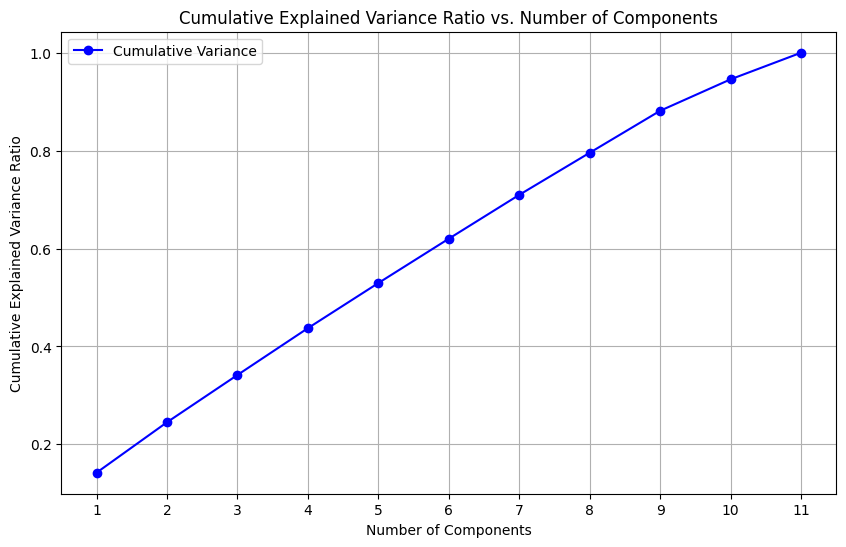

Explained variance ratios for all components:
PC1 explained variance ratio: 0.14
PC2 explained variance ratio: 0.10
PC3 explained variance ratio: 0.10
PC4 explained variance ratio: 0.10
PC5 explained variance ratio: 0.09
PC6 explained variance ratio: 0.09
PC7 explained variance ratio: 0.09
PC8 explained variance ratio: 0.09
PC9 explained variance ratio: 0.09
PC10 explained variance ratio: 0.06
PC11 explained variance ratio: 0.05


In [38]:
X = encoded_df.drop(['age_in_days', 'lon'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA()
pca_result = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-', label='Cumulative Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))  
plt.grid(True)
plt.legend()
plt.show()
print("Explained variance ratios for all components:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1} explained variance ratio: {ratio:.2f}")

# The first few principal components (PC1 to PC7) explain a significant portion of the variance in the dataset (71%), suggesting that these components capture the most important features of the data.


# 🔍📈 🤖📊 Model Performance and Optimization
 

# 1) KNN Model:

# 1.1) Before Tuning

In [39]:
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)
cv_scores_before = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2').mean()

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

train_r2_before = r2_score(y_train, y_train_pred)
test_r2_before = r2_score(y_test, y_test_pred)

train_mse_before = mean_squared_error(y_train, y_train_pred)
test_mse_before = mean_squared_error(y_test, y_test_pred)

train_rmse_before = np.sqrt(train_mse_before)
test_rmse_before = np.sqrt(test_mse_before)

print("\n=== Model Performance Metrics ===")
print()

metrics_df = pd.DataFrame({
    'Metric': [
        'Train R²', 'Test R²',
        'Train RMSE', 'Test RMSE',
        'Cross-Validation'],
    'Value': [
        round(train_r2_before, 2),
        round(test_r2_before, 2),
        round(train_rmse_before, 2),
        round(test_rmse_before, 2),
        round(cv_scores_before, 2)]})
metrics_df


=== Model Performance Metrics ===



,Metric,Value
0,Train R²,0.79
1,Test R²,0.68
2,Train RMSE,877.17
3,Test RMSE,1108.25
4,Cross-Validation,0.69


# The model exhibits solid training performance, but the gap in metrics between the training and test sets suggests some degree of overfitting. While the model's accuracy is acceptable, further tuning or regularization techniques could help improve its ability to generalize to unseen data.

# 1.2) "Tuning KNN Model"

In [40]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

cv_scores_tuned = grid_search.best_score_
y_train_pred_tuned = best_knn.predict(X_train_scaled)
y_test_pred_tuned = best_knn.predict(X_test_scaled)

train_r2_tuned = r2_score(y_train, y_train_pred_tuned)
test_r2_tuned = r2_score(y_test, y_test_pred_tuned)

train_rmse_tuned = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned))
test_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))

metrics_df = pd.DataFrame({
    'Metric': [
        'Train R²', 'Test R²',
        'Train RMSE', 'Test RMSE',
        'Cross-Validation'],
    'Value': [
        round(train_r2_tuned, 2),
        round(test_r2_tuned, 2),
        round(train_rmse_tuned, 2),
        round(test_rmse_tuned, 2),
        round(cv_scores_tuned, 2)]})

print("\n=== Model Performance Metrics ===")
metrics_df.reset_index(drop=True)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

=== Model Performance Metrics ===


,Metric,Value
0,Train R²,0.76
1,Test R²,0.68
2,Train RMSE,942.16
3,Test RMSE,1099.77
4,Cross-Validation,0.71


# The KNN model with optimal parameters (metric: Manhattan, n_neighbors: 9, weights: uniform) performs reasonably well. It explains 76% of the variance in the training data and 68% in the test data, suggesting some overfitting. The RMSE values (942.16 for training and 1099.77 for testing) indicate fairly accurate predictions, though test set performance can be improved. A cross-validation R² of 0.71 demonstrates good consistency across different data splits.

# 1.3) "KNN Model Evaluation"

In [41]:
y_train_pred_tuned = best_knn.predict(X_train_scaled)
y_test_pred_tuned = best_knn.predict(X_test_scaled)

train_r2_tuned = r2_score(y_train, y_train_pred_tuned)
test_r2_tuned = r2_score(y_test, y_test_pred_tuned)

train_mse_tuned = mean_squared_error(y_train, y_train_pred_tuned)
test_mse_tuned = mean_squared_error(y_test, y_test_pred_tuned)

train_rmse_tuned = np.sqrt(train_mse_tuned)
test_rmse_tuned = np.sqrt(test_mse_tuned)

cv_scores_tuned = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring='r2').mean()

metrics_before_tuning = {
    'Model': 'KNN (Before Tuning)',
    'Cross-Val': round(cv_scores_before, 2),
    'Train_R²': round(train_r2_before, 2),
    'Test_R²': round(test_r2_before, 2),
    'Train_RMSE': round(train_rmse_before, 2),
    'Test_RMSE': round(test_rmse_before, 2),}
metrics_after_tuning = {
    'Model': 'KNN (After Tuning)',
    'Cross-Val': round(cv_scores_tuned, 2),
    'Train_R²': round(train_r2_tuned, 2),
    'Test_R²': round(test_r2_tuned, 2),
    'Train_RMSE': round(train_rmse_tuned, 2),
    'Test_RMSE': round(test_rmse_tuned, 2),}

result = pd.DataFrame([metrics_before_tuning, metrics_after_tuning])
result.set_index('Model', inplace=True)
print("\n=== Model Performance Metrics ===")
print()
result


=== Model Performance Metrics ===



,Cross-Val,Train_R²,Test_R²,Train_RMSE,Test_RMSE
Model,,,,,
KNN (Before Tuning),0.69,0.79,0.68,877.17,1108.25
KNN (After Tuning),0.71,0.76,0.68,942.16,1099.77


# After tuning, the KNN model shows a slight improvement in test RMSE (1099.77 vs. 1108.25), indicating better accuracy on unseen data. However, the model's R² values are slightly lower after tuning, suggesting a minor loss in training data fit. Additionally, cross-validation performance is better after tuning, reflecting improved generalization. Overall, the tuned model demonstrates better generalization.

# 2) Random Forest Model

# 2.1) Before Tuning

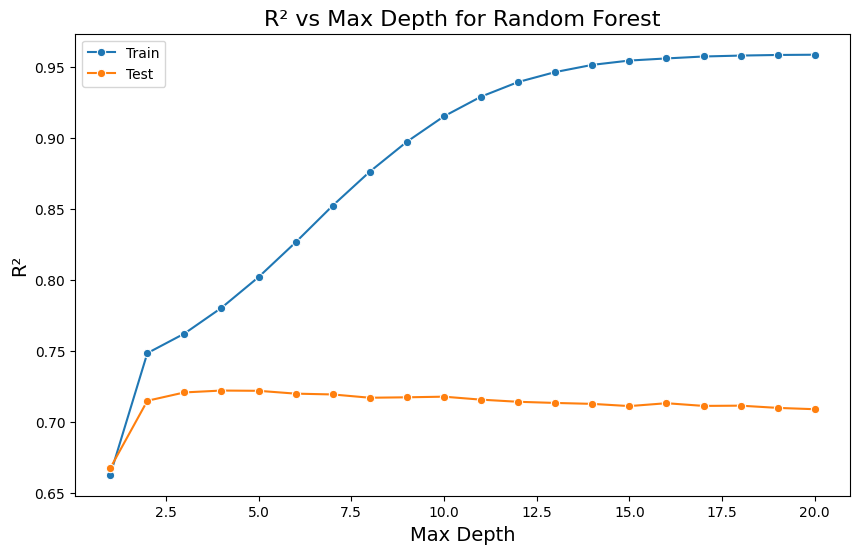

In [42]:
max_depth_range = range(1, 21)

train_r2_list = []
test_r2_list = []
cv_scores_list = []

for max_depth in max_depth_range:
    rf_model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    rf_model.fit(X_train_scaled, y_train)

    y_train_pred = rf_model.predict(X_train_scaled)
    y_test_pred = rf_model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

    cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2').mean()
    cv_scores_list.append(cv_scores)

metrics_df = pd.DataFrame({
    'max_depth': max_depth_range,
    'Train_R²': train_r2_list,
    'Test_R²': test_r2_list,
    'Cross Validation': cv_scores_list})

plt.figure(figsize=(10, 6))
sns.lineplot(x='max_depth', y='Train_R²', data=metrics_df, label='Train', marker='o')
sns.lineplot(x='max_depth', y='Test_R²', data=metrics_df, label='Test', marker='o')
plt.title('R² vs Max Depth for Random Forest', fontsize=16)
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('R²', fontsize=14)
plt.legend()
plt.show()

# The best max_depth for the model is 2 or 3. If it's increased more, the difference between the training and test R² values becomes larger, showing overfitting. Overfitting happens when the model is too focused on the training data, picking up noise instead of real patterns. While deeper trees may work better on the training data, they perform worse on new, unseen data. A max_depth of 2 or 3 balances complexity and generalization, helping the model perform well on both training and test data.

# 2.2) Tuning Random Forest Model

In [43]:
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 7, 10],
    "n_estimators": [80, 100, 120, 150, 200],
    "min_samples_split": [2, 5, 10, 15, 20]}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

y_train_pred_after = best_rf.predict(X_train_scaled)
y_test_pred_after = best_rf.predict(X_test_scaled)

train_r2_after_rf = r2_score(y_train, y_train_pred_after)
test_r2_after_rf = r2_score(y_test, y_test_pred_after)

train_mse_after_rf = mean_squared_error(y_train, y_train_pred_after)
test_mse_after_rf = mean_squared_error(y_test, y_test_pred_after)

train_rmse_after_rf = np.sqrt(train_mse_after_rf)
test_rmse_after_rf = np.sqrt(test_mse_after_rf)

cv_scores_after_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='r2').mean()
print(f"Best Parameters: max_depth = {best_params['max_depth']}, n_estimators = {best_params['n_estimators']}, min_samples_split = {best_params['min_samples_split']}")

metrics_df = pd.DataFrame({
    'Metric': [
        'Train R²', 'Test R²',
        'Train RMSE', 'Test RMSE',
        'Cross-Validation'],
    'Value': [
        round(train_r2_after_rf, 2),
        round(test_r2_after_rf, 2),
        round(train_rmse_after_rf, 2),
        round(test_rmse_after_rf, 2),
        round(cv_scores_after_rf, 2)]})

print("\n=== Model Performance Metrics ===")
metrics_df

Best Parameters: max_depth = 4, n_estimators = 200, min_samples_split = 20

=== Model Performance Metrics ===


,Metric,Value
0,Train R²,0.78
1,Test R²,0.72
2,Train RMSE,905.63
3,Test RMSE,1028.87
4,Cross-Validation,0.75


# After tuning the Random Forest model's hyperparameters, the best values found were max_depth = 4, n_estimators = 200, and min_samples_split = 20. The model performs well, balancing accuracy on the training data and generalization to new data. The small difference between training and test performance shows that overfitting has been minimized, and the model can make accurate predictions.

# 3) XGBoost Model

# 3.1) Before Tuning:

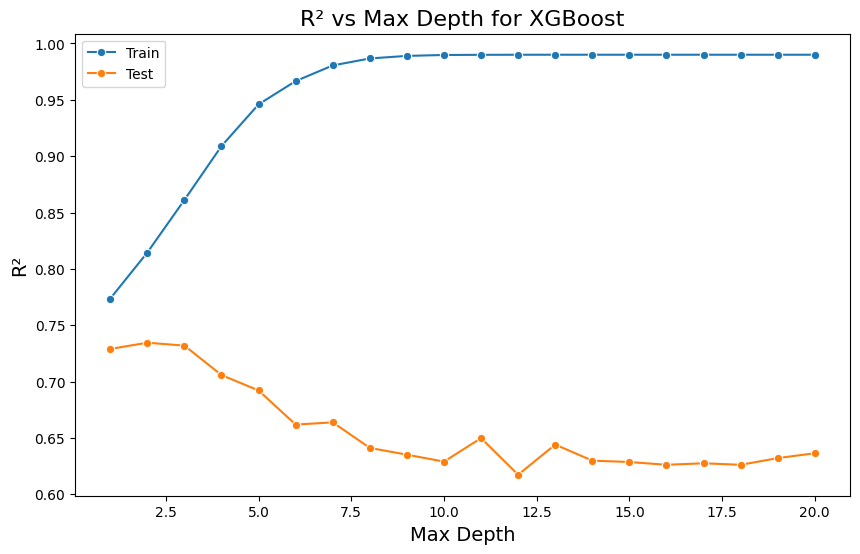

In [44]:
metrics_list = []

for max_depth in range(1, 21):
    xgb_before = XGBRegressor(max_depth=max_depth, random_state=42)
    xgb_before.fit(X_train_scaled, y_train)
    
    y_train_pred_before = xgb_before.predict(X_train_scaled)
    y_test_pred_before = xgb_before.predict(X_test_scaled)

    train_r2_before = r2_score(y_train, y_train_pred_before)
    test_r2_before = r2_score(y_test, y_test_pred_before)

    train_mse_before = mean_squared_error(y_train, y_train_pred_before)
    test_mse_before = mean_squared_error(y_test, y_test_pred_before)

    train_rmse_before = np.sqrt(train_mse_before)
    test_rmse_before = np.sqrt(test_mse_before)

    cv_scores_before = cross_val_score(xgb_before, X_train_scaled, y_train, cv=5, scoring='r2').mean()

    metrics_list.append({
        'max_depth': max_depth,
        'Train R²': train_r2_before,
        'Test R²': test_r2_before,
        'Train RMSE': train_rmse_before,
        'Test RMSE': test_rmse_before,
        'Cross-Validation': cv_scores_before})
metrics_df_xgb = pd.DataFrame(metrics_list)

plt.figure(figsize=(10, 6))
sns.lineplot(x='max_depth', y='Train R²', data=metrics_df_xgb, label='Train', marker='o')
sns.lineplot(x='max_depth', y='Test R²', data=metrics_df_xgb, label='Test', marker='o')
plt.title('R² vs Max Depth for XGBoost', fontsize=16)
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('R²', fontsize=14)
plt.legend()
plt.show()

# The best max_depth is 2 because increasing it makes the R² values for training and testing more different. This difference indicates overfitting, where the model focuses too much on the training data and struggles to perform well on new data. A deeper model becomes too complex, fitting noise and lowering performance on the test set. Therefore, a max_depth of 2 provides the best balance between bias and variance, leading to better generalization.

# 3.2) Tuning XGBoost Model

In [45]:
param_grid = {
    "max_depth": [3, 4, 5, 6, 7],
    "n_estimators": [50, 100, 150, 200, 250],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3]}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

y_train_pred_after = best_xgb.predict(X_train_scaled)
y_test_pred_after = best_xgb.predict(X_test_scaled)

train_r2_after_xgb = round(r2_score(y_train, y_train_pred_after), 2)
test_r2_after_xgb = round(r2_score(y_test, y_test_pred_after), 2)

train_mse_after_xgb = mean_squared_error(y_train, y_train_pred_after)
test_mse_after_xgb = mean_squared_error(y_test, y_test_pred_after)

train_rmse_after_xgb = round(np.sqrt(train_mse_after_xgb), 2)
test_rmse_after_xgb = round(np.sqrt(test_mse_after_xgb), 2)

cv_scores_after_xgb = round(cross_val_score(best_xgb, X_train_scaled, y_train, cv=5, scoring='r2').mean(), 2)

print('Best Params:', best_params)
results = {
    'Model': ['Tuned'],
    'Cros_val': [cv_scores_after_xgb],
    'Train_R²': [train_r2_after_xgb],
    'Test_R²': [test_r2_after_xgb],
    'Train_RMSE': [train_rmse_after_xgb],
    'Test_RMSE': [test_rmse_after_xgb]}

results_df = pd.DataFrame(results)
print("\n=== Model Performance Metrics ===")
results_df

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

=== Model Performance Metrics ===


,Model,Cros_val,Train_R²,Test_R²,Train_RMSE,Test_RMSE
0,Tuned,0.75,0.81,0.74,838.8,999.85


# The tuned model shows strong performance, with a cross-validation score of 0.75 and consistent R² values of 0.81 on the training set and 0.74 on the test set, indicating good generalization. The low RMSE values of 838.8 for the training set and 999.85 for the test set suggest the model predicts accurately across different data splits.

# 📊🌲✨"Comparing Model Performance: KNN, RF, & XGB"

In [46]:
knn_metrics = {
    'Train R²': train_r2_tuned,
    'Test R²': test_r2_tuned,
    'Train RMSE': train_rmse_tuned,
    'Test RMSE': test_rmse_tuned,
    'Cross-Validation': cv_scores_tuned}

rf_metrics = {
    'Train R²': train_r2_after_rf,
    'Test R²': test_r2_after_rf,
    'Train RMSE': train_rmse_after_rf,
    'Test RMSE': test_rmse_after_rf,
    'Cross-Validation': cv_scores_after_rf}

print("\n=== Model Comparison ===")
metrics_df

xgb_metrics = {
    'Train R²': train_r2_after_xgb,
    'Test R²': test_r2_after_xgb,
    'Train RMSE': train_rmse_after_xgb,
    'Test RMSE': test_rmse_after_xgb,
    'Cross-Validation': cv_scores_after_xgb}

comparison_df = pd.DataFrame({
    'KNN': [
        knn_metrics['Cross-Validation'],
        knn_metrics['Train R²'], knn_metrics['Test R²'],
        knn_metrics['Train RMSE'], knn_metrics['Test RMSE']],
    'Random Forest': [
        rf_metrics['Cross-Validation'],
        rf_metrics['Train R²'], rf_metrics['Test R²'],
        rf_metrics['Train RMSE'], rf_metrics['Test RMSE']],
    'XGBoost': [
        xgb_metrics['Cross-Validation'],
        xgb_metrics['Train R²'], xgb_metrics['Test R²'],
        xgb_metrics['Train RMSE'], xgb_metrics['Test RMSE']]})

comparison_df['Metric'] = [
    'Cross-Val',
    'Train_R²', 'Test_R²',
    'Train_RMSE', 'Test_RMSE']

comparison_df = comparison_df.set_index('Metric').T
comparison_df = comparison_df.round(2)
comparison_df


=== Model Comparison ===


Metric,Cross-Val,Train_R²,Test_R²,Train_RMSE,Test_RMSE
KNN,0.71,0.76,0.68,942.16,1099.77
Random Forest,0.75,0.78,0.72,905.63,1028.87
XGBoost,0.75,0.81,0.74,838.80,999.85


# XGBoost performs the best among the three models due to its higher R² values, lower RMSE, and better generalization to unseen data, as indicated by its strong cross-validation performance. XGBoost's higher accuracy and ability to handle complex patterns give it an advantage.

# 🌟📊 "Feature Importance Analysis for Champion Model (XGBoost)"

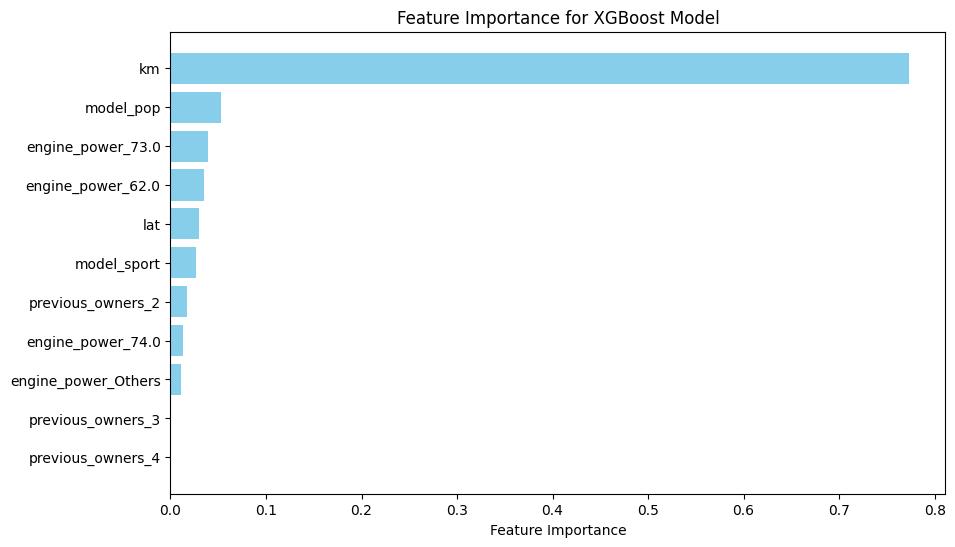


Feature Importance:
                 Feature  Importance
0                    km    0.772700
2             model_pop    0.053302
5     engine_power_73.0    0.039283
4     engine_power_62.0    0.035425
1                   lat    0.030352
3           model_sport    0.027224
8     previous_owners_2    0.017127
6     engine_power_74.0    0.013123
7   engine_power_Others    0.011464
9     previous_owners_3    0.000000
10    previous_owners_4    0.000000


In [47]:
feature_importances = best_xgb.feature_importances_
feature_names = X_train_scaled_df.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for XGBoost Model')
plt.gca().invert_yaxis()
plt.show()
print("\nFeature Importance:\n", feature_importance_df)


# The feature importance analysis shows that km (kilometers driven) and model_pop (model popularity) are the most significant features for predicting the target variable. Other features such as specific engine powers and the number of previous owners contribute less significantly. Features with an importance of zero, such as previous_owners_3 and previous_owners_4, are irrelevant in this model and can potentially be excluded in future iterations to simplify the model.

# 🌟📊 "Visualizing Performance of Champion Model (XGBoost)"

# 1. Residual Plot

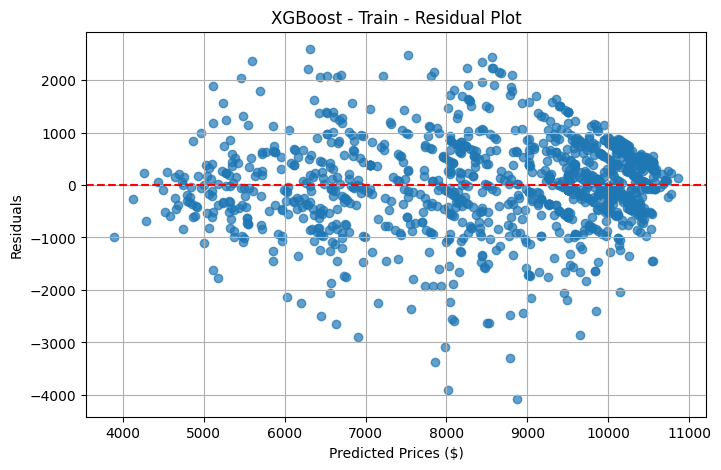

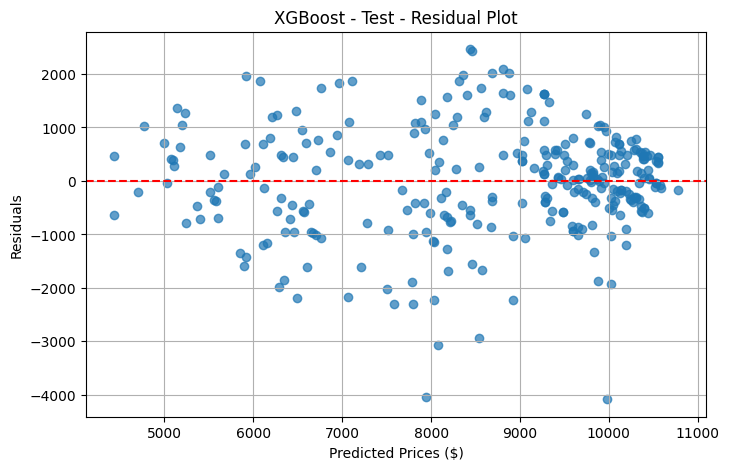

In [49]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f"{model_name} - Residual Plot")
    plt.xlabel("Predicted Prices ($)")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()

plot_residuals(y_train, y_train_pred_after, "XGBoost - Train")
plot_residuals(y_test, y_test_pred_after, "XGBoost - Test")


# By comparing the train and test plots, I observed that the test residuals have smaller variances, which may indicate reduced overfitting. Ideally, residuals should be randomly distributed around zero.

# 2. Actual vs Predicted Plot

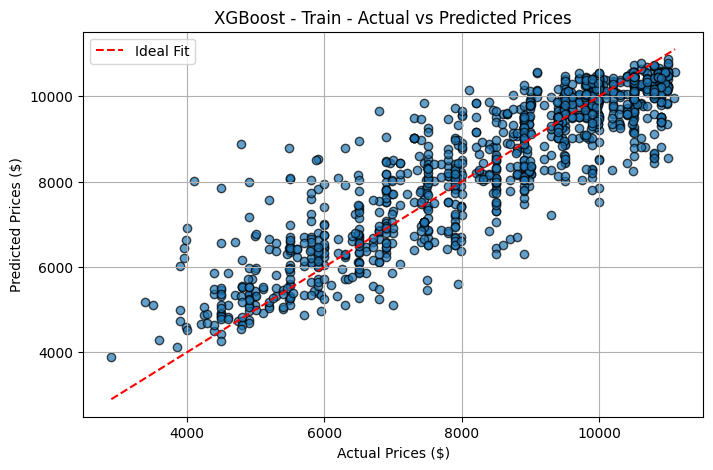

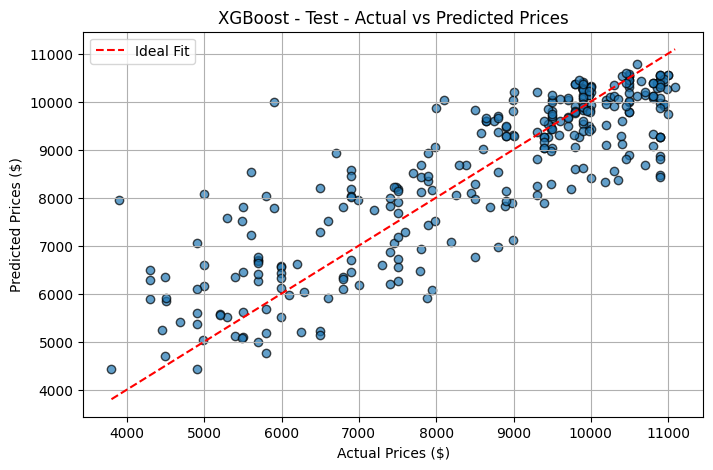

In [51]:
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label="Ideal Fit")
    plt.title(f"{model_name} - Actual vs Predicted Prices")
    plt.xlabel("Actual Prices ($)")
    plt.ylabel("Predicted Prices ($)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_actual_vs_predicted(y_train, y_train_pred_after, "XGBoost - Train")
plot_actual_vs_predicted(y_test, y_test_pred_after, "XGBoost - Test")


# Since the points in the test plot lie close to the diagonal line, it suggests good generalization ability. Ideally, points should be close to the diagonal line (where actual = predicted) for accurate predictions.

# 3. Error Distribution Plot

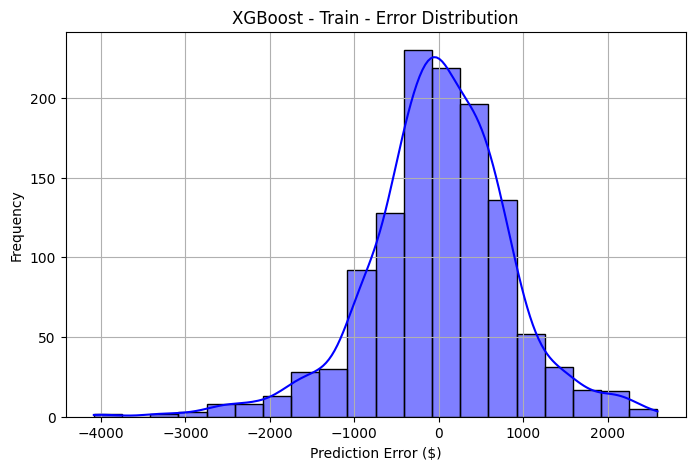

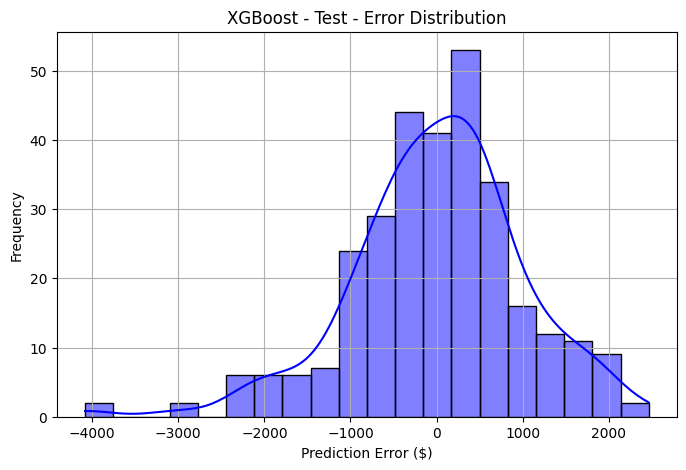

In [52]:
def plot_error_distribution(y_true, y_pred, model_name):
    errors = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(errors, bins=20, kde=True, color='blue')
    plt.title(f"{model_name} - Error Distribution")
    plt.xlabel("Prediction Error ($)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    
plot_error_distribution(y_train, y_train_pred_after, "XGBoost - Train")
plot_error_distribution(y_test, y_test_pred_after, "XGBoost - Test")


# Since the errors in the test plot are distributed around zero, it suggests a good fit, which may indicate less overfitting.

# XGBoost Regression typically demonstrates:

# Residuals that are randomly distributed around zero.
# Predictions that closely align with actual values.
# A narrower error distribution, indicating fewer significant errors.
# These observations reinforce our conclusion that the XGBoost model is the most suitable choice for predicting car prices.

# 😊😊Thank You!